# Unit 5 - Financial Planning


In [3]:
# Initial imports
import json
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
#from tqdm import tqdm_notebook as tqdm
#from pivottablejs import pivot_ui
# Load .env enviroment variables
load_dotenv()

True

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
shares_data = {
    "Shares":[1.2,5.3,50,200]
    }
mytickers= ["BTC","ETH","SPY","AGG"]
port_df=pd.DataFrame(shares_data, index=mytickers)
port_df

Shares
BTC     1.2
ETH     5.3
SPY    50.0
AGG   200.0

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_data=requests.get(btc_url).json()
eth_data=requests.get(eth_url).json()
print(json.dumps(eth_data,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114444169,
            "total_supply": 114444169,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1365.67,
                    "volume_24h": 34058200258,
                    "market_cap": 156293343726,
                    "percentage_change_1h": 1.53775415968836,
                    "percentage_change_24h": 10.0547873562268,
                    "percentage_change_7d": 21.6188578103292,
                    "percent_change_1h": 1.53775415968836,
                    "percent_change_24h": 10.0547873562268,
                    "percent_change_7d": 21.6188578103292
                }
            },
            "last_updated": 1611880539
        }
    },
    "metadata": {
        "timestamp": 1611880539,
        "num_crypto

In [9]:
# Fetch current BTC price
my_btc_amount=port_df['Shares']['BTC']
btc_price=btc_data['data']['1']['quotes']['USD']['price']
my_eth_amount=port_df['Shares']['ETH']
eth_price=eth_data['data']['1027']['quotes']['USD']['price']
my_btc_value=round(my_btc_amount*btc_price,2)
my_eth_value=round(my_eth_amount*eth_price,2)
#print current crypto wallet balance
print(f"The current value of your {my_btc_amount} BTC is ${my_btc_value:.2f}")
print(f"The current value of your {my_eth_amount} ETH is ${my_eth_value:.2f}")

The current value of your 1.2 BTC is $40831.20
The current value of your 5.3 ETH is $7238.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
my_agg_amount=port_df['Shares']['AGG']
my_spy_amount=port_df['Shares']['SPY']

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# verify loaded a str
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [15]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-15", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
close_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

In [17]:
# Pick AGG and SPY close prices
agg_close_price=round(float(close_data['AGG']['close']),2)
spy_close_price=round(float(close_data['SPY']['close']),2)
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.64
Current SPY closing price: $321.87


In [19]:
# Compute the current value of shares
my_agg_value=agg_close_price*my_agg_amount
my_spy_value=spy_close_price*my_spy_amount
total_value={'Current Value':[my_btc_value,my_eth_value,my_spy_value, my_agg_value]}
stocks_df=pd.DataFrame(total_value, index=mytickers)
port_df=pd.concat([port_df,stocks_df],axis="columns",join='outer')
print(port_df)
# Print current value of share
print(f"The current value of your {my_btc_amount} BTC is ${my_btc_value:.2f}")
print(f"The current value of your {my_eth_amount} ETH is ${my_eth_value:.2f}")
print(f"The current value of your {my_spy_amount} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg_amount} AGG shares is ${my_agg_value:0.2f}")



     Shares  Current Value  Current Value
BTC     1.2       40831.20       40831.20
ETH     5.3        7238.05        7238.05
SPY    50.0       16093.50       16093.50
AGG   200.0       23728.00       23728.00
The current value of your 1.2 BTC is $40831.20
The current value of your 5.3 ETH is $7238.05
The current value of your 50.0 SPY shares is $16093.50
The current value of your 200.0 AGG shares is $23728.00


### Savings Health Analysis

In [21]:
# Set monthly household income
monthly_income=12000
#Determine Crypto and Shares total PV then Combine into a readable df
crypto_value=(my_btc_value+my_eth_value)
crypto= { 'Total AUM': crypto_value}
shares_value=(my_spy_value+my_agg_value)
shares={ 'Total AUM': (my_spy_value+my_agg_value)}
# Create savings DataFrame
savings_df=pd.DataFrame([shares,crypto]).rename({1:'Crypto',0:'Shares'})
# Display savings DataFrame
savings_df.head()

Total AUM
Shares   39821.50
Crypto   48069.25

array([<AxesSubplot:ylabel='Total AUM'>], dtype=object)

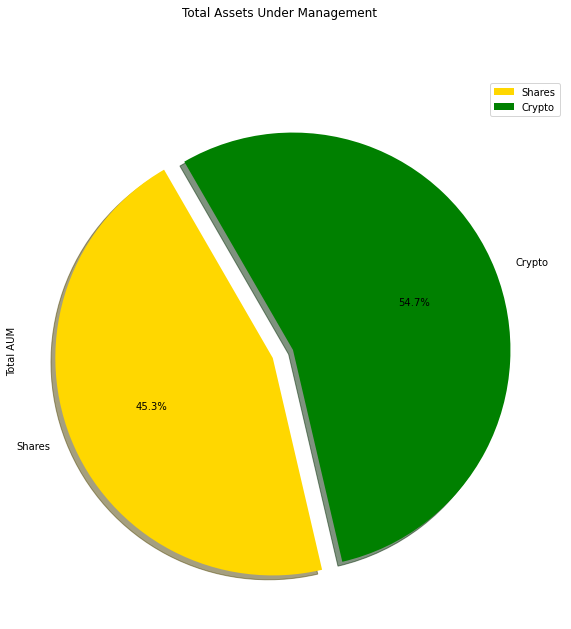

In [23]:
# Plot savings pie chart
savings_df.plot(kind='pie',
              subplots=True
            , figsize=(15,10)
            , explode=(0.1,0)
            , autopct='%1.1f%%'
            , shadow=True
            , startangle=120
            
            , title='Total Assets Under Management'
            , colors=['gold','green']
                 )

In [25]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#Create total amount saved variable
pvn=crypto_value+shares_value
# Validate total amount of savings
if (pvn) > (emergency_fund):
    print(f'You have ${round((pvn-emergency_fund),2)} excess based on your emergency fund reqs.')
if pvn < (emergency_fund):
    print(f'You have ${round((pvn-emergency_fund),2)} remaining to meet emergency fund reqs.')
if pvn == (emergency_fund):
    print(f'!!!Congrats!!! You have arrived at your Financial Emergency Fund Goal')

You have $51890.75 excess based on your emergency fund reqs.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp("2016-01-20", tz='America/New_York').isoformat()
end_date = pd.Timestamp("2021-01-20", tz='America/New_York').isoformat()

In [29]:
# Get 5 years' worth of historical data for SPY and AGG
stocks_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
    ).df
# Display sample data
stocks_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-20 00:00:00-05:00  185.03  188.06  181.02  185.79  245668486  
2016-01-21 00:00:00-05:00  186.21  188.87  184.64  186.68  154918462  
2016-01-22 00:00:00-05:00  189.78  190.76  188.88  190.49  132418951  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear=MCSimulation(
          portfolio_data=stocks_data
        , weights=[.4,.]
        , num_simulation=50
        , num_trading_days=252*30
    )

In [32]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-20 00:00:00-05:00          NaN  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   

                                                   
                              volume daily_return  
time                                               
2016-01-20 00:00:00-05:00  245668486          NaN  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429

In [17]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0           1          2          3          4         5   \
0      1.000000    1.000000   1.000000   1.000000   1.000000  1.000000   
1      1.001024    0.989443   0.992470   0.996438   1.005311  1.002769   
2      0.991231    0.989902   0.981626   1.007701   1.000594  0.988958   
3      0.988329    0.990979   0.982817   1.014686   0.998225  0.998138   
4      0.988491    0.996459   0.991854   1.007891   1.001454  0.997254   
5      0.990551    1.002206   1.002225   1.019198   0.996336  1.005842   
6      0.994913    1.016484   1.010730   1.027315   0.996122  1.014531   
7      0.989863    1.021429   1.013636   1.036382   0.991878  1.030444   
8      0.995004    1.022488   1.006390   1.041639   0.986886  1.031822   
9      0.994565    1.017653   1.015259   1.043964   1.002848  1.039417   
10     0.989450    1.029600   1.014841   1.041168   0.998141  1.038627   
11     0.986850    1.026135   1.014641   1.047210   1.002377  1.046057   
12     1.006726    1.021212   1.023226   1.041150   1.002527  1.051953   
13     1.013180    1.014420   1.029694   1.037713   1.010926  1.052258   
14     1.014074    1.020724   1.025491   1.043222   1.010876  1.041543   
15     1.001155    1.052276   1.012732   1.056428   1.001813  1.041251   
16     0.995435    1.037039   1.020453   1.057332   1.019846  1.057771   
17     0.997363    1.038437   1.021298   1.064305   1.026615  1.057225   
18     0.994273    1.028780   1.018336   1.069267   1.012825  1.037097   
19     1.009021    1.027180   1.011544   1.064248   1.005964  1.032042   
20     1.010984    1.032672   1.015516   1.085369   1.007064  1.035986   
21     1.017763    1.032287   1.012094   1.084907   1.015990  1.040334   
22     1.019775    1.027917   1.005033   1.088645   1.011544  1.040186   
23     1.018456    1.034794   1.010620   1.094661   1.015436  1.048992   
24     1.027203    1.027998   1.008117   1.100113   1.017617  1.060980   
25     1.033933    1.027071   1.006630   1.109256   1.019818  1.064521   
26     1.027222    1.023945   1.010984   1.099367   1.028067  1.046019   
27     1.022956    1.022251   1.012303   1.095715   1.024205  1.048406   
28     1.013030    1.019680   1.016747   1.077097   1.018087  1.054188   
29     1.010874    1.022091   1.012854   1.085129   1.014954  1.050108   
...         ...         ...        ...        ...        ...       ...   
7531  11.931012   98.735828  50.410320  24.011715  48.934134  9.010607   
7532  11.785168   98.816481  50.984542  23.937811  48.995037  9.064300   
7533  11.854751   98.518291  50.909180  23.786437  48.660960  8.966685   
7534  11.819155   97.949727  50.902761  23.455986  48.922137  8.908500   
7535  11.827537   97.639449  50.965803  23.570365  48.503258  8.933680   
7536  11.858573   98.215577  51.389639  23.659211  48.558514  9.004874   
7537  11.832238   98.275106  51.490224  23.966311  48.569570  8.948692   
7538  11.816713   98.760068  52.072833  24.471164  48.869573  8.970252   
7539  11.812717   97.535958  52.409887  24.365045  49.027548  9.025601   
7540  11.785968   97.056147  52.677059  24.148888  48.441619  9.098458   
7541  11.693883   96.710564  52.467667  24.008368  48.179605  8.938939   
7542  11.640678   96.675113  52.611751  23.916179  47.414574  8.825667   
7543  11.511068   96.561306  52.476874  23.706677  47.021792  8.797058   
7544  11.482036   96.951721  53.138403  23.740131  47.295719  8.843531   
7545  11.610444   96.431067  52.916612  23.517207  47.637262  8.882436   
7546  11.523066   96.989182  52.564595  23.455526  47.620338  8.909049   
7547  11.396657   98.357223  52.832336  23.514908  47.765575  9.045791   
7548  11.455856   99.204601  52.858808  23.515889  48.255515  9.151482   
7549  11.516939  100.186577  52.478749  23.677433  48.242468  9.096050   
7550  11.566400  101.185618  52.546773  23.463414  48.027285  9.028307   
7551  11.551375  100.884071  52.433610  23.757998  48.010025  9.030953   
7552  11.540456  101.264486  52.023807  23.794669  47.714246  8.976187   
7553  11.606532  

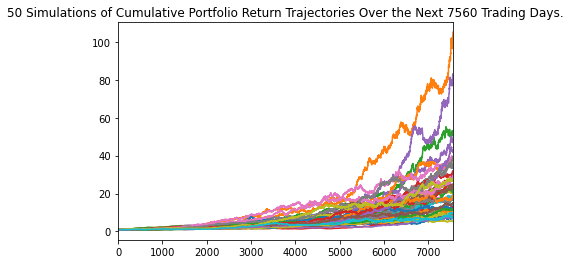

In [18]:
# Plot simulation outcomes
line_plot=MC_thirtyyear.plot_simulation()
line_plot.get_figure().savefig('MC_thirtyyear_sim_plot.png',bbox_inches='tight')

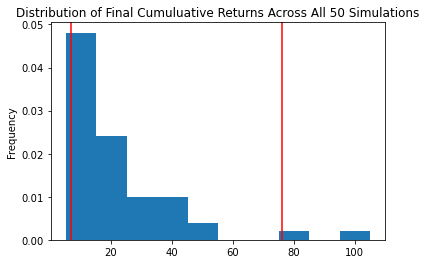

In [19]:
# Plot probability distribution and confidence intervals
dist_plot=MC_thirtyyear.plot_distribution()
line_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            50.000000
mean             22.443466
std              18.866292
min               5.296305
25%              10.838291
50%              16.814992
75%              28.682341
max             105.121403
95% CI Lower      6.939539
95% CI Upper     76.115957
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [21]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $138790.78 and $1522319.13


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [22]:
# Set initial investment
initial_investment = initial_investment*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $208186.17 and $2283478.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [23]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear=MCSimulation(
              portfolio_data=stocks_data
            , weights=[.8,.2]
            , num_simulation=50
            , num_trading_days=252*5
    )
MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926.0   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-20 00:00:00-05:00          NaN  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   

                                                   
                              volume daily_return  
time                                               
2016-01-20 00:00:00-05:00  245668486          NaN  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429

In [24]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997909  0.999556  1.000101  1.004677  1.000169  0.996863  1.000389   
2     0.996704  0.996073  1.002822  1.002336  1.004467  0.992932  0.995641   
3     0.999990  0.998062  1.005941  1.005589  0.999617  0.997282  1.000620   
4     1.003286  1.000732  1.005968  1.007526  0.995315  0.999048  0.998967   
5     0.999758  0.999034  1.004458  1.012351  0.993316  1.000319  0.998289   
6     0.998098  0.995771  1.005970  1.010948  0.998185  1.005228  0.995768   
7     1.000049  0.993484  1.007715  1.007535  1.001820  1.001699  0.992151   
8     1.003389  0.991810  1.009312  1.013680  1.004516  1.003391  0.986469   
9     1.003925  0.991517  1.010309  1.012377  1.013512  1.000440  0.984728   
10    0.998045  0.997828  1.008342  1.009308  1.018343  1.003430  0.994217   
11    0.993753  0.999596  1.000626  1.012774  1.019558  1.008393  0.991039   
12    0.994079  1.000901  0.998670  1.011912  1.021837  1.013150  0.998731   
13    0.985159  1.000400  1.000595  1.013646  1.021465  1.013225  0.998654   
14    0.985441  1.005817  1.005712  1.011780  1.021229  1.012566  1.002242   
15    0.987270  1.008024  1.010010  1.011744  1.014959  1.016628  0.999292   
16    0.991252  1.002499  1.015105  1.011326  1.012936  1.016225  0.998201   
17    0.994022  1.002237  1.016461  1.014553  1.014471  1.013416  0.995368   
18    0.990914  0.997039  1.019317  1.014597  1.018931  1.015700  0.994652   
19    0.989667  0.997802  1.019108  1.019286  1.016454  1.019057  0.997034   
20    0.992620  0.996425  1.015259  1.025777  1.016011  1.019879  0.995055   
21    0.993711  0.996663  1.014694  1.028222  1.015001  1.023156  0.996663   
22    0.989735  1.000285  1.015350  1.023720  1.022726  1.023614  0.994114   
23    0.980950  0.999220  1.021443  1.020359  1.021851  1.018067  0.991442   
24    0.981858  0.997694  1.022877  1.025983  1.023560  1.022639  0.990932   
25    0.978676  0.998556  1.016664  1.026969  1.023843  1.021623  0.997082   
26    0.983385  0.996473  1.016520  1.028910  1.027966  1.023042  0.997772   
27    0.983150  1.002437  1.015844  1.024269  1.026514  1.024400  0.997121   
28    0.986107  1.001280  1.015769  1.022423  1.032742  1.025679  0.996847   
29    0.986064  1.002343  1.018938  1.029253  1.030568  1.025115  0.997739   
...        ...       ...       ...       ...       ...       ...       ...   
1231  1.138664  1.309855  1.163619  1.277504  1.149275  1.246298  1.338962   
1232  1.138005  1.315154  1.168401  1.274318  1.151418  1.249509  1.343284   
1233  1.130083  1.319636  1.167150  1.280471  1.149708  1.252182  1.350258   
1234  1.128228  1.317715  1.167944  1.277616  1.149046  1.251469  1.346491   
1235  1.121467  1.320684  1.165922  1.275593  1.148622  1.255495  1.336957   
1236  1.121161  1.316197  1.166471  1.274083  1.146288  1.254654  1.343031   
1237  1.113540  1.316164  1.171376  1.275279  1.144917  1.254091  1.347437   
1238  1.107592  1.307896  1.174176  1.281343  1.146405  1.255687  1.351432   
1239  1.107819  1.307550  1.178178  1.276529  1.147614  1.252458  1.356642   
1240  1.110034  1.302626  1.174104  1.274464  1.148280  1.253825  1.357130   
1241  1.111069  1.300492  1.173509  1.265540  1.146947  1.250860  1.357011   
1242  1.114071  1.302636  1.173163  1.269047  1.151567  1.251448  1.359848   
1243  1.106661  1.303052  1.174514  1.265361  1.154271  1.257000  1.360104   
1244  1.105215  1.307070  1.170696  1.266530  1.155865  1.259004  1.358335   
1245  1.107098  1.312004  1.168798  1.267365  1.160233  1.253595  1.361975   
1246  1.099649  1.309849  1.178925  1.272013  1.159769  1.257403  1.361477   
1247  1.102108  1.311564  1.175811  1.270209  1.150373  1.257568  1.362951   
1248  1.106322  1.307077  1.174608  1.266045  1.154280  1.255418  1.358847   
1249  1.107182  1.308694  1.173423  1.267669  1.148348  1.245271  1.352226   
1250  1.110684  1.306154  1.171340

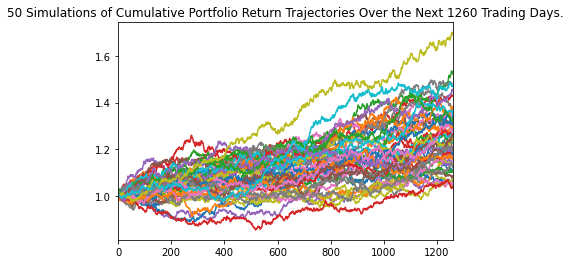

In [25]:
# Plot simulation outcomes
fiveyear_lineplot=MC_fiveyear.plot_simulation()

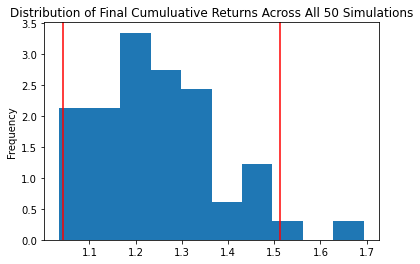

In [26]:
# Plot probability distribution and confidence intervals
fiveyear_distplot=MC_fiveyear.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_tbl=MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(fiveyear_tbl)

count           50.000000
mean             1.245931
std              0.138196
min              1.035144
25%              1.159605
50%              1.233709
75%              1.325504
max              1.693659
95% CI Lower     1.042516
95% CI Upper     1.511542
Name: 1260, dtype: float64


In [28]:
# Set initial investment
initial_investment=initial_investment*2
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
fiveyear_lower = round(fiveyear_tbl[8]*initial_investment,2)
fiveyear_upper = round(fiveyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${fiveyear_lower} and ${fiveyear_upper}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 5 years will end within in the range of $62550.95 and $90692.52


### Ten Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear=MCSimulation(
              portfolio_data=stocks_data
            , weights=[.2,.8]
            , num_simulation=50
            , num_trading_days=252*10
    )
MC_tenyear.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926.0   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-20 00:00:00-05:00          NaN  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   

                                                   
                              volume daily_return  
time                                               
2016-01-20 00:00:00-05:00  245668486          NaN  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.988502  1.008170  0.987099  1.005186  0.996453  0.979107  0.994996   
2     1.004076  1.009100  0.984695  0.986545  0.990069  0.963762  0.988494   
3     1.012147  1.002311  0.984152  0.989339  0.974652  0.971752  0.987156   
4     1.031579  0.987727  0.978958  0.981858  0.973290  0.965533  0.993490   
5     1.041660  1.006890  0.966103  0.980938  0.990387  0.974180  0.984098   
6     1.035226  1.026115  0.960282  0.994177  0.997928  0.982672  0.986901   
7     1.031308  1.029523  0.962975  1.000815  1.001428  0.970720  0.995772   
8     1.055833  1.041658  0.970129  1.014644  1.006727  0.959946  0.986628   
9     1.059137  1.053683  0.970226  1.015125  1.009598  0.970121  0.980833   
10    1.049664  1.033740  0.966548  1.011559  1.031025  0.976991  0.986385   
11    1.043256  1.051587  0.964471  1.012479  1.041271  0.976470  0.987241   
12    1.061703  1.042086  0.968453  1.009344  1.044128  0.972028  0.986274   
13    1.065591  1.047865  0.978008  1.026035  1.045736  0.969241  0.963705   
14    1.071447  1.045867  0.979456  1.024875  1.055090  0.965731  0.972194   
15    1.075445  1.049105  0.990166  1.027122  1.051252  0.950480  0.969981   
16    1.081409  1.038870  0.980052  1.025720  1.053507  0.946409  0.966008   
17    1.082884  1.036443  0.990350  1.021901  1.046213  0.964522  0.963429   
18    1.095657  1.043823  0.991058  1.020640  1.045684  0.959388  0.966066   
19    1.091041  1.049020  0.998800  1.019899  1.057663  0.952712  0.944850   
20    1.096617  1.047642  1.011731  1.017779  1.055836  0.945755  0.944214   
21    1.105879  1.042841  1.010500  1.005204  1.074069  0.952446  0.952296   
22    1.105910  1.057615  1.003628  1.018223  1.074636  0.962301  0.956724   
23    1.098914  1.068129  1.010713  1.018724  1.073697  0.965566  0.955048   
24    1.110083  1.084093  1.009980  1.025925  1.054021  0.966155  0.945504   
25    1.103362  1.093388  1.005661  1.039965  1.042103  0.956781  0.950032   
26    1.097642  1.089134  1.002590  1.054385  1.056678  0.964803  0.946363   
27    1.081854  1.076486  0.996858  1.052630  1.054542  0.963195  0.950702   
28    1.091130  1.086016  1.009696  1.060509  1.053275  0.968559  0.952855   
29    1.090639  1.085413  1.014588  1.058427  1.060740  0.965435  0.955297   
...        ...       ...       ...       ...       ...       ...       ...   
2491  6.612587  6.356440  3.012951  2.405099  4.930022  1.653726  5.158714   
2492  6.543481  6.340862  2.999270  2.392011  4.874643  1.672997  5.128590   
2493  6.449012  6.313603  3.052132  2.349083  4.867160  1.670342  5.118092   
2494  6.533835  6.339533  3.046446  2.321072  4.848980  1.673807  5.141528   
2495  6.474254  6.343135  3.040580  2.304699  4.830146  1.679789  5.142299   
2496  6.430561  6.385934  3.025168  2.277258  4.803757  1.681338  5.088817   
2497  6.356709  6.360187  3.054448  2.271983  4.775317  1.685484  5.114072   
2498  6.404836  6.371979  3.032764  2.277847  4.766013  1.688219  5.073802   
2499  6.307119  6.387955  2.997797  2.303115  4.768166  1.660847  5.048389   
2500  6.298639  6.302979  2.987280  2.329878  4.723994  1.677638  5.076367   
2501  6.262361  6.207201  2.994192  2.307209  4.670560  1.670386  5.061295   
2502  6.225932  6.272978  3.048958  2.318087  4.702285  1.656236  5.110800   
2503  6.211033  6.357666  3.066056  2.347377  4.718615  1.651875  5.090319   
2504  6.264409  6.490023  3.066153  2.352937  4.676787  1.643649  5.174613   
2505  6.275462  6.637691  3.088187  2.362355  4.676046  1.655427  5.095541   
2506  6.276193  6.651907  3.107177  2.361783  4.747617  1.665391  5.092480   
2507  6.284086  6.608884  3.077544  2.406866  4.831083  1.666953  5.114789   
2508  6.318070  6.569155  3.063152  2.439809  4.849788  1.664505  5.128357   
2509  6.192350  6.525676  3.101774  2.421432  4.765730  1.668348  5.173097   
2510  6.090138  6.507678  3.140462

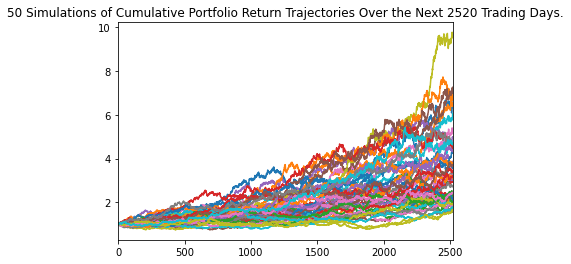

In [31]:
# Plot simulation outcomes
tenyear_lineplot=MC_tenyear.plot_simulation()

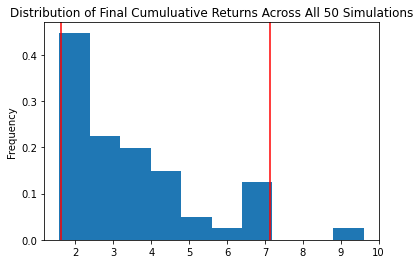

In [32]:
# Plot probability distribution and confidence intervals
tenyear_distplot=MC_tenyear.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyear_tbl=MC_tenyear.summarize_cumulative_return()
# Print summary statistics
print(tenyear_tbl)

count           50.000000
mean             3.495165
std              1.813688
min              1.576104
25%              2.045924
50%              3.084141
75%              4.371455
max              9.607030
95% CI Lower     1.611922
95% CI Upper     7.131881
Name: 2520, dtype: float64


In [34]:
# Set initial investment
initial_investment = initial_investment
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
tenyear_lower=round(tbl[8]*initial_investment,2)
tenyear_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${tenyear_lower} and ${tenyear_upper}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 10 years will end within in the range of $416372.35 and $4566957.39
